Modify the scratch code of gaussian mixture clustering in our lecture:
- Modify so it performs early stopping when the log likelihood does not improve anymore.  Note that if you log the normal distribution, you will get negative sign.  Thus if you ignore the negative sign, it will become negative likelihood, and thus will get smaller and smaller.
- Perform plotting every 5 iterations on the resulting clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

0 PDF difference: 7.752707577899503
1 PDF difference: 5.4552653292106985
2 PDF difference: 6.117529965884872
3 PDF difference: 9.590988896912904
4 PDF difference: 12.227596253085885
5 PDF difference: 39.375013811581674
6 PDF difference: 102.03354786196871
7 PDF difference: 7.169624952411198
8 PDF difference: 19.510559860431727
9 PDF difference: 8.174835762741282
10 PDF difference: 2.1155504208959712
11 PDF difference: 2.6911675504587436
12 PDF difference: 1.6727537384662412
13 PDF difference: 0.9257164271936915
14 PDF difference: 0.45603540706778745
15 PDF difference: 0.19349228544930952
16 PDF difference: 0.07539886373979243
17 PDF difference: 0.028136677908946695
18 PDF difference: 0.010282611564832678
Early stopping at: 19


Text(0.5, 1.0, 'Final')

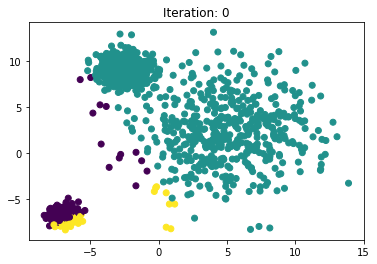

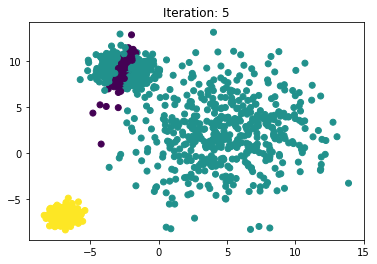

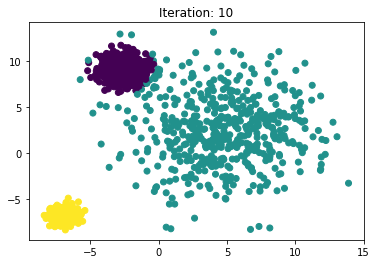

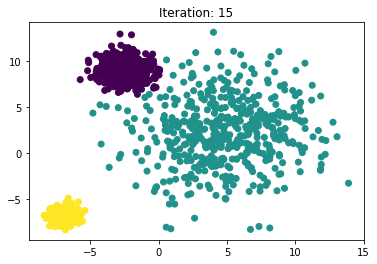

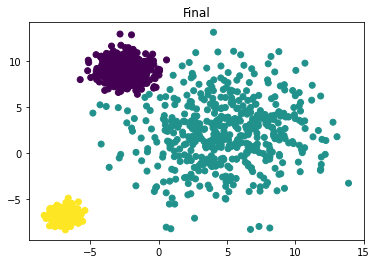

In [2]:
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
import math

X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 3.5, 0.5], random_state=42)

#define basic params
m, n = X.shape
K = 3
max_iter = 50
old_sum_pdf = 0
attempt = 3

#==initialization==

#responsibliity
r = np.full(shape=(m, K), fill_value=1/K)

#pi
pi = np.full((K, ), fill_value=1/K) #simply use 1/k for pi

#mean
random_row = np.random.randint(low=0, high=m, size=K)
mean = np.array([X[idx,:] for idx in random_row ]).T #.T to make to shape (M, K)

#covariance
cov = np.array([np.cov(X.T) for _ in range (K)])

for iteration in range(max_iter):
    
    #===E-Step=====
    #Update r_ik of each sample
    for i in range(m):
        for k in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov=cov[k])
            r[i, k] = pi[k] * xi_pdf
        r[i] /= np.sum(r[i])
    
    # early stopping
    sum_pdf = 0
    for i in range(m):
        for k in range(K):
            xi_pdf = multivariate_normal.pdf(X[i], mean=mean[:, k], cov=cov[k])
            sum_pdf += xi_pdf
    if math.fabs(old_sum_pdf - sum_pdf) < .1:
        if attempt == 3:
            print(f"Early stopping at: {iteration}")
            break
        attempt += 1
    else:
        attempt = 0
    print(f"{iteration} PDF difference: {math.fabs(sum_pdf - old_sum_pdf)}")
    old_sum_pdf = sum_pdf
    
    #===M-Step====
    # Find NK first for latter use
    NK = np.sum(r, axis=0)
    assert NK.shape == (K, )
    
    #PI
    pi = NK / m
    assert pi.shape == (K, )
    
    #mean
    mean =  ( X.T @ r ) / NK
    assert mean.shape == (n, K)
    
    #covariance (also called Sigma)
    cov = np.zeros((K, n, n))
    for k in range(K):
        for i in range(m):
            X_mean = (X[i]-mean[:, k]).reshape(-1, 1)
            cov[k] += r[i, k] * (X_mean @ X_mean.T)
        cov[k] /= NK[k]
    assert cov.shape == (K, n, n)

    # plot each iteration % 5
    if iteration % 5 == 0:
        yhat = np.argmax(r, axis=1)
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=yhat)
        plt.title(f"Iteration: {iteration}")
        
#get preds

yhat = np.argmax(r, axis=1)

#plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat)
plt.title("Final")